In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab

from IPython.display import Audio
from tqdm import tqdm

In [18]:
path = './ljspeech/wavs/LJ001-0001.wav'
y, sr = librosa.load(path, sr=16000)
S = librosa.feature.melspectrogram(y=y, sr=sr)
S.shape

(128, 302)

In [25]:
test = np.load('ljspeech/wavs/LJ001-0001.wav.spec.npy')
test_audio = librosa.feature.inverse.mel_to_audio(test)

test.shape

(80, 832)

In [26]:
Audio(data=test_audio, rate=sr)

In [5]:
S.shape

(128, 225)

0.0

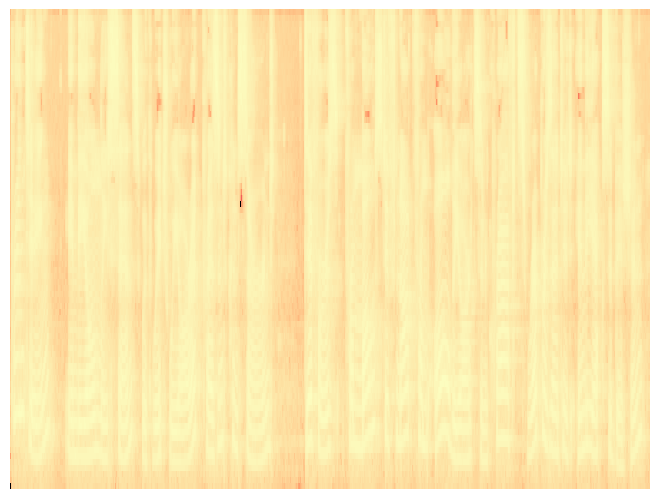

In [30]:
pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
librosa.display.specshow(librosa.power_to_db(test, ref=np.max))

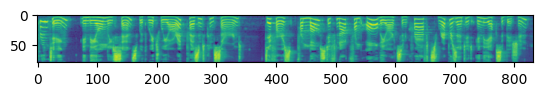

In [40]:
plt.imshow(test)
plt.show()

In [14]:
Audio(data=y, rate=sr)